Desafio Frequencias e medidas


In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

In [113]:
enem = pd.read_json('/content/enem_2023.json')
enem.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [114]:
#Verificando tipos de colunas
enem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [115]:
est_desc = enem.describe()

est_desc.loc['Amplitude'] = est_desc.loc['max'] - est_desc.loc['min']
est_desc

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000
Amplitude,517.456317,474.019695,487.604568,488.077902,729.160035


In [116]:
# 1
maior_amplitude = est_desc.loc['max'] - est_desc.loc['min']
print('A disciplina com maior Amplitude de nota:', maior_amplitude.idxmax())

A disciplina com maior Amplitude de nota: Redação


In [117]:
# 2
### Media e mediana
media = enem[['Linguagens','Ciências humanas','Ciências da natureza','Matemática','Redação']].mean()

In [118]:
enem[['Linguagens','Ciências humanas','Ciências da natureza','Matemática','Redação']].median()

Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    500.479263
Matemática              533.247767
Redação                 635.273973
dtype: float64

In [119]:
## 3
pesos = {
    'Linguagens': 2,
    'Ciências Humanas': 1,
    'Ciências da Natureza': 1,
    'Matemática': 4,
    'Redação': 2
}


enem['Ponderada'] = (enem.loc[:,'Linguagens':'Redação'] * pd.Series(pesos)).sum(axis=1)
enem.head()


,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Ponderada
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem,4073.207341
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher,3851.240554
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem,5293.229872
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem,4749.239244
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem,4338.644201


In [121]:
# Calculo da media considerando cada peso
enem['media'] = enem['Ponderada'] / 5

In [122]:
melhores = enem.sort_values('media', ascending=False).head(500)
melhores.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Ponderada,media
count,499.000000,467.000000,413.000000,500.000000,500.000000,500.000000,500.000000
mean,528.489301,527.548095,500.616364,570.293253,669.636434,4675.310527,935.062105
std,83.597657,79.466851,76.643835,73.239776,110.165486,319.280644,63.856129
min,287.000000,289.900000,314.400000,403.514272,365.700041,4204.639576,840.927915
25%,469.266415,472.454249,448.177943,522.732183,598.885156,4408.355137,881.671027
50%,526.906550,527.011022,502.270885,564.757397,667.739444,4628.710897,925.742179
75%,583.153730,586.746997,548.057505,617.140377,743.922821,4899.537349,979.907470
max,804.456317,763.919695,802.004568,807.877902,1000.000000,5859.303961,1171.860792


In [123]:
## 4
#40 estudantes aprovados para ciencia da computação
aprovados_cc = enem.sort_values('media', ascending=False).head(40)

#Media dos aprovados
m = aprovados_cc['media'].mean()

#variança
est = enem.describe()
est.loc['variança'] = est.loc['std']*est.loc['std']

est


,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Ponderada,media
count,897.000000,936.000000,824.000000,924.000000,860.000000,1000.000000,1000.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532,4000.974263,800.194853
std,84.009313,77.811519,78.760404,86.648100,115.339972,909.900226,181.980045
min,287.000000,289.900000,314.400000,319.800000,270.839965,0.000000,0.000000
25%,458.360558,475.424546,444.709076,479.172971,556.468366,3535.868131,707.173626
50%,515.045250,524.519920,500.479263,533.247767,635.273973,4204.106541,840.821308
75%,571.635876,581.401952,548.751678,592.912963,715.989868,4628.694660,925.738932
max,804.456317,763.919695,802.004568,807.877902,1000.000000,5859.303961,1171.860792
variança,7057.564698,6054.632515,6203.201190,7507.893239,13303.309244,827918.420841,33116.736834


In [124]:
# media dos aprovados
m

1064.478610456105

In [125]:
## 5
est.loc['75%']['Matemática']

592.9129628887

In [126]:
est.loc['75%']['Linguagens']

571.6358759278

Text(0.5, 0, 'Frequencia')

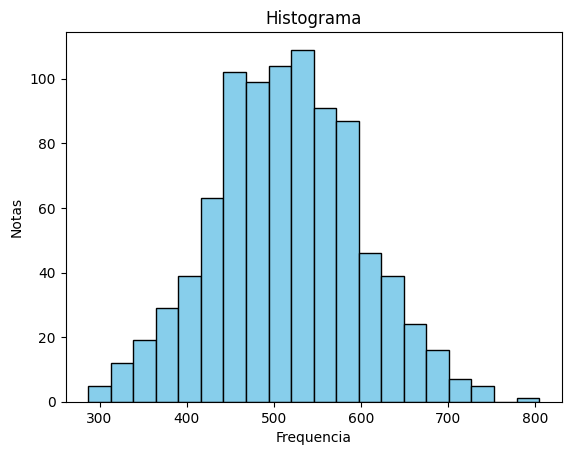

In [127]:
# 6
# Histogramas

l = enem['Linguagens']
plt.hist(l, bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma')
plt.ylabel('Notas')
plt.xlabel('Frequencia')

# Simétrico,


Text(0.5, 0, 'Frequencia')

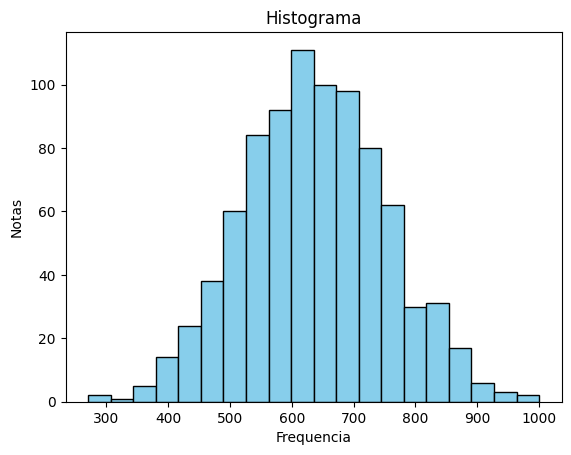

In [128]:
r = enem['Redação']

plt.hist(r, bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma')
plt.ylabel('Notas')
plt.xlabel('Frequencia')

 #Simétrico

Text(0.5, 0, 'Frequencia')

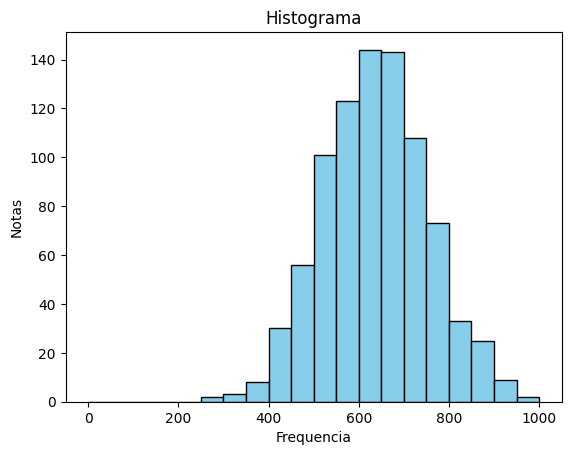

In [129]:
# 7
r = enem['Redação']
plt.hist(r, bins=20, range=[0,1000],color='skyblue', edgecolor='black')
plt.title('Histograma')
plt.ylabel('Notas')
plt.xlabel('Frequencia')


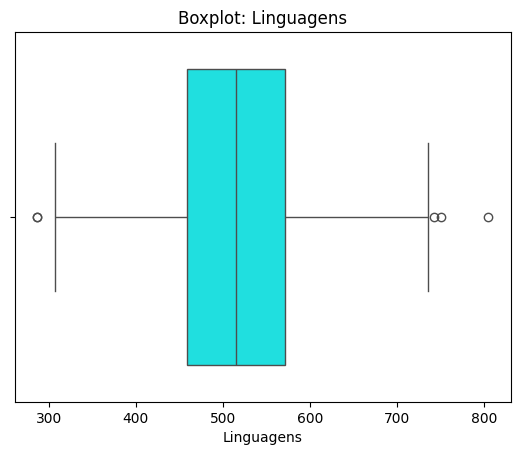

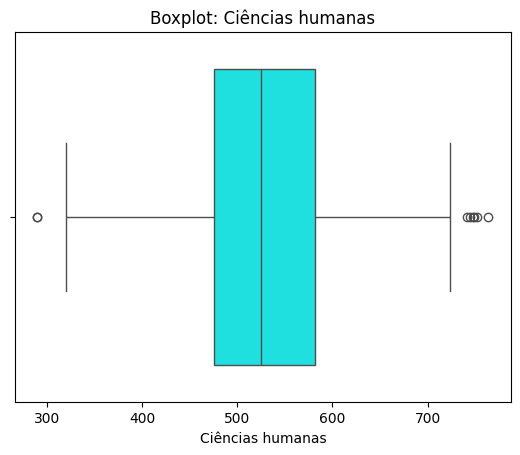

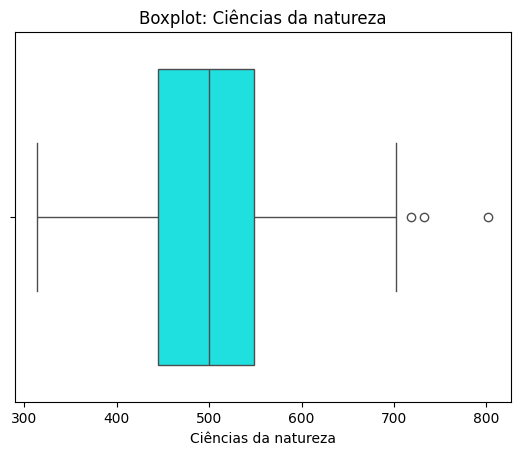

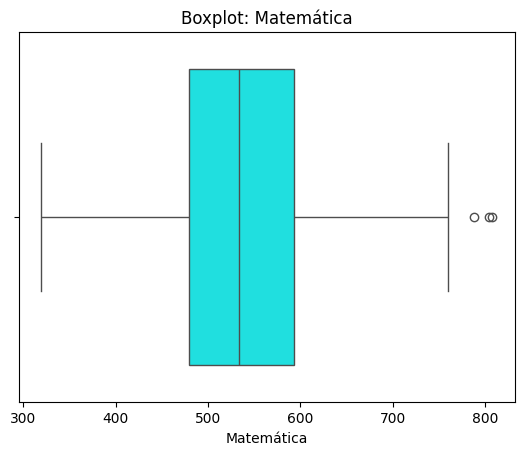

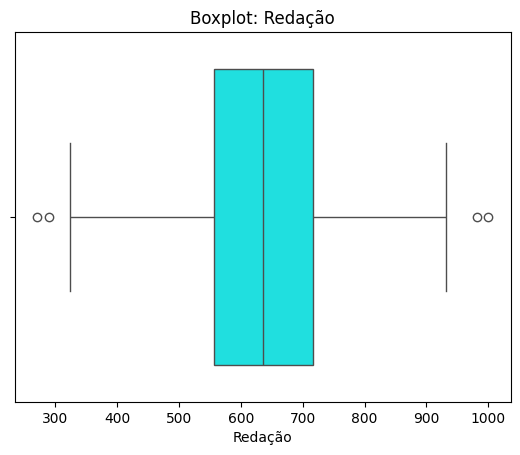

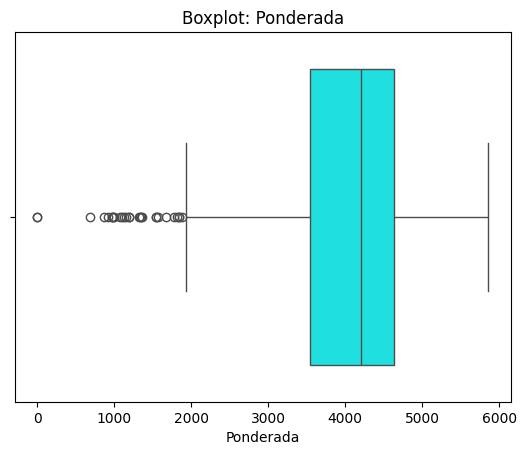

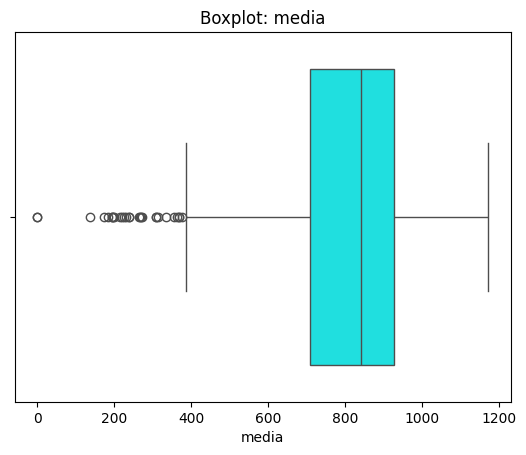

In [130]:
## 8
# BOXPLOT

for column in enem.select_dtypes(np.number).columns:
  plt.figure()
  sns.boxplot(data= enem, x = column, color='cyan', showfliers=True)
  plt.title("Boxplot: "+column )

In [133]:
## é possivel visualizar outliers na disciplina de ciencias humanas, e na coluna das medias ponderadas

IQR:  nan
Número de outliers encontrado:  0
IQR:  nan
Número de outliers encontrado:  0
IQR:  nan
Número de outliers encontrado:  0
IQR:  nan
Número de outliers encontrado:  0
IQR:  nan
Número de outliers encontrado:  0
IQR:  1092.8265289020496
Número de outliers encontrado:  28
IQR:  218.56530578040997
Número de outliers encontrado:  28


<Figure size 1000x600 with 0 Axes>

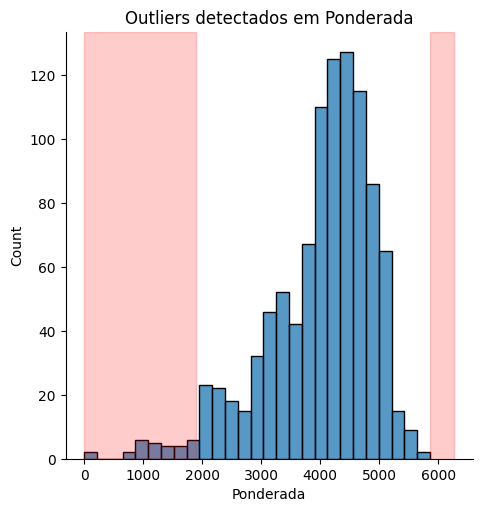

<Figure size 1000x600 with 0 Axes>

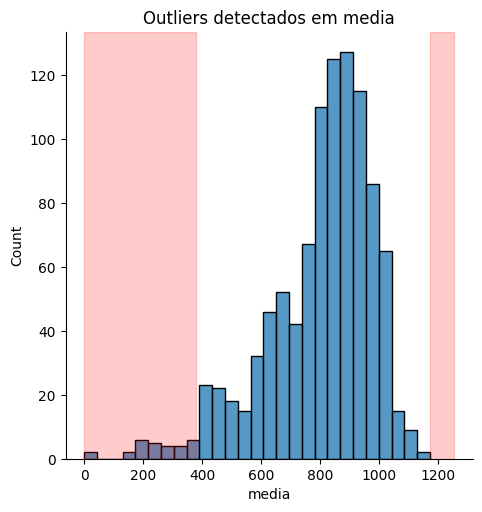

In [132]:
## 9

def outlier_iqr(dataset, colname):

    q25, q75 = np.quantile(dataset[colname], 0.25), np.quantile(dataset[colname], 0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5

    inferior, superior = q25 - cut_off, q75 + cut_off
    print('IQR: ', iqr)

    outliers = []

    for i in dataset[colname].values:
      if((i > superior) or (i < inferior)):
        outliers.append(i)
    print('Número de outliers encontrado: ', len(outliers))
    return inferior, superior, outliers

for column in enem.select_dtypes(include=np.number).columns:
  inferior, superior, outliers =  outlier_iqr(enem, column)
  if (len(outliers) > 0):
    plt.figure(figsize = (10,6))
    sns.displot(enem[column], kde=False)
    plt.axvspan(xmin = inferior,xmax= enem[column].min(),alpha=0.2, color='red')
    plt.axvspan(xmin = superior,xmax= enem[column].max(),alpha=0.2, color='red')
    plt.title("Outliers detectados em {}".format(column))




In [135]:
def procurar_outliers(dataset, threshold, colname):

    df = dataset[colname]
    outliers = []
    zscore = []
    val = []
    threshold = threshold
    mean = np.mean(df)
    std = np.std(df)
    for i in df.values:
      z_score= (i - mean)/std
      zscore.append(z_score)
      if np.abs(z_score) > threshold:
          outliers.append(i)
          val.append(np.nan)
      else:
          val.append(i)

    return val

In [136]:
def excluir_outliers(dataset, threshold):
  ### vamos utilizar a funcao drop NA para remover outliers
  for column in dataset.select_dtypes(include=np.number).columns:
    dataset[column] =  procurar_outliers(dataset, 3, column)
  return dataset.dropna()

In [140]:
def substituicao_outliers(dataset, threshold):
  ### vamos utilizar a funcao fillna para trocar os NaNs pela mediana
  for column in dataset.select_dtypes(include=np.number).columns:
    dataset[column] =  procurar_outliers(dataset, 3, column)
  return dataset.fillna(dataset.median())

In [139]:
#excluindo

ex = excluir_outliers(enem, 5)

In [141]:
# Substituindo

dados = substituicao_outliers(enem, 5)

<ipython-input-140-4b2a628ffb8a>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return dataset.fillna(dataset.median())
